# Data Challenge for Capital One #
## Minoo Taghavi ##
### minoo.tgh1991@gmail.com ###
---
## Executive Statement
---
Table of Content:
1. [Problem Statement](#problem)
2. [Importing Libraries](#libraries)
3. [Procedure- Exploratory Data Analysis](#EDA)
    * [Airbnb dataset](#Airbnb)
    * [Zillow dataset](#Zillow)
4. [Data Cleaning](#DataCleaning)
5. [Analyzing relationships between variables](#Analyzing)
6. [Feature Engineering](#FeatureEngineering)
7. [Merging airbnb and zillow dataset](#Merging)
8. [Folium Map](#Folium)
9. [Hypothesis Insight](#Insight)
10.[Conclusion and Final Insights](#Conclusion)

***
<a id = problem> </a>
# Problem Statement #
The purpose of this analysis is to provide the best zip codes within NYC for investment on short-term rental two-bedroom properties for a real estate company. 

Based on the analysis, the zip codes within NYC are ranked based on their expected return on investment and zip codes with the highest ROIs in the list, are expected to be the most profitable to invest in.
The initial assumption of the analysis are as follows:

1- The investor will pay for the properties in cash, there would be no mortgage and interest rate to be accounted for.

2- The inflation rate is not considered.

3- Occupancy of all the properties within NYC is the same as 75%.

4- All properties within each locale are assumed to be homogeneous.

Besides the analysis steps and results provided, the limitations of this analysis and some insights for further future analysis are also discussed within the report. 

Below, the steps taken for this analysis are listed:

***
<a id = libraries> </a>
### Importing Libraries ###

In [3]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import datetime
import plotly_express


import warnings
warnings.filterwarnings(
    action='ignore',
    category=DeprecationWarning,
    module=r'.*randpool'
)
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import plotly.offline as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

***
<a id = EDA> </a>
# Procedure- Exploratory Data Analysis #
1- The two datasets were fully investigated to identify the key features, complementary fields, and the common field between the two datasets. 

2- Since only two-bedroom properties were of interest and the Zillow dataset only provided data for two-bedroom properties the Airbnb dataset was also restricted to two-bedroom properties only in order to obtain comparable data.

3- Missing data were investigated. When dealing with missing data, the best approach is to fill in or impute the missing data reasonably when possible. Data exploration showed that Airbnb dataset had records with missing zip codes, but all those records had GPS coordinates that can be used for populating the corresponding location zip code. Since missing Zip Codes are imputable using latitude and longitude information, a code was developed using uszipcode package from PyPI and was used to impute the missing/null zip codes in the Airbnb dataset.

4- Data from both Airbnb and Zillow datasets was restricted to NYC properties only. A list of NYC zip codes, extracted from the website of the [**New York State Department of Health**](https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm), was used to identify and filter records with zip codes matching the NYC zip codes.

5- Since the Airbnb dataset lacked the actual occupancy information for rental properties, it was assumed that all rental properties have an occupancy rate of 75%. However, having the actual occupancy data is critical for such analysis and will result in more accurate results.

6- Since return on investment for a rental property depends on: 1. rental income, and 2. change in property value, the average yearly change of two-bedroom property value in each zip code was considered in the analysis by addition of a Home Price Appreciation Rate column to the data.

7- The two datasets were checked to make sure all records are unique, and duplicate records do not exist. Then, the Airbnb dataset data were averaged for each NYC zip code (using groupby and mean) to obtain one record for each zip code with averaged nightly prices. The Zillow dataset already had unique zip codes and did not need averaging. This step is critical before merging the two datasets.

8- For the following reasons it was decided to use 2014 to 2017 average property values from Zillow dataset to calculate the annual property value appreciation rate for each zip code:
•	It was deemed that the 2008 recession disrupted the normal real state market and the disruption in the market affected the property values for the following couple of years. Thus, it was decided to use a range of years far from 2008.
•	The most recent available property value data are expected to better represent the current and near future market trends.
•	The most recent data are expected to be more accurate and the Zillow dataset had no missing data between years 2014 and 2017 for the NYC zip codes.

9- After the needed data cleaning, imputation, exploration, and manipulations were performed on the Airbnb (limited to 2 bedroom NYC properties) and Zillow datasets (limited to NYC zip codes), the two datasets were merged using the “zip code” field. The final merged table is based on unique zip codes and contains information such as zip code, average nightly price of rental properties, and average values of properties in different years.

10- Several metrics were developed to investigate the return on investment within each NYC zip code based on the available data in the two datasets.

**EDA steps:**
>
>Understanding the variables
>
>Cleaning the datasets
>
>Analyzing relationships between variables


<a id = Airbnb> </a>
### Airbnb dataset ###

In [4]:
# Reading Airbnb Data set
airbnb_data= pd.read_csv('./listings.csv', dtype={'zipcode':str},low_memory=False)

In [5]:
#Looking at shape of the data set, number of rows and columns
airbnb_data.shape

(48895, 106)

In [6]:
#Exploring the airbnb dataset
airbnb_data.head(2)

id                        listing_url       scrape_id last_scraped  \
0  2539  https://www.airbnb.com/rooms/2539  20190708031610   2019-07-09   
1  2595  https://www.airbnb.com/rooms/2595  20190708031610   2019-07-09   

                                 name  \
0  Clean & quiet apt home by the park   
1               Skylit Midtown Castle   

                                             summary  \
0           Renovated apt home in elevator building.   
1  Find your romantic getaway to this beautiful, ...   

                                               space  \
0  Spacious, renovated, and clean apt home, one b...   
1  - Spacious (500+ft²), immaculate and nicely fu...   

                                         description experiences_offered  \
0  Renovated apt home in elevator building. Spaci...                none   
1  Find your romantic getaway to this beautiful, ...                none   

                               neighborhood_overview  ... instant_bookable  \
0    Close to Prospect Park and Historic Ditmas Park  ...                f   
1  Centrally located in the heart of Manhattan ju...  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f                     moderate   
1                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             t                                t   

   calculated_host_listings_count  \
0                               6   
1                               2   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            5   
1                                            0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            1               0.21  
1                                            1               0.38  

[2 rows x 106 columns]

In [7]:
#Through info(), data types and memory usage can be checked.
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 39.5+ MB


In [8]:
#Exploring column names
airbnb_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [9]:
#Exploring columns statistics such as count, mean and standard deviation.
#airbnb_data.describe().T

In [10]:
# Missing values
#airbnb_data.isnull().sum()

**Explore and filter out the properties with 2 bedrooms**

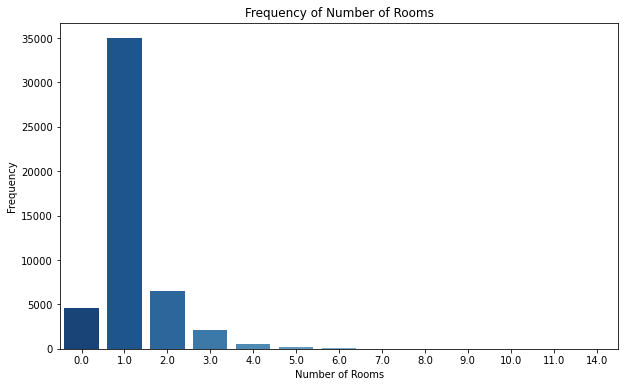

In [11]:
#Since the problem statement asked for 2 bedroom prperties, let's find out the frequency of 2 bedroom properties in our data set.
plt.figure(figsize=(10, 6))
rooms=sns.countplot(airbnb_data['bedrooms'], palette='Blues_r').set(
    title='Frequency of Number of Rooms',
    xlabel='Number of Rooms',
    ylabel='Frequency');

In [12]:
#And let's filter just the 2 bedroom properties.
airbnb_data=airbnb_data.loc[airbnb_data['bedrooms']==2].reset_index(drop=True)

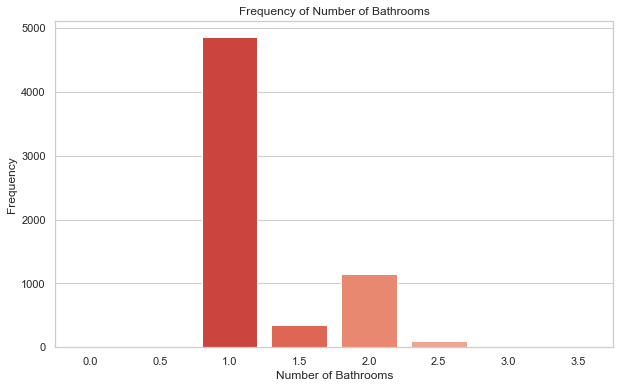

In [13]:
#I wonder if the number of bathroom could also be a factor?! Let's look at the frequency of it.
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
rooms=sns.countplot(airbnb_data['bathrooms'],palette='Reds_r').set(
    title='Frequency of Number of Bathrooms',
    xlabel='Number of Bathrooms',
    ylabel='Frequency');

<a id = Zillow> </a>
### Zillow dataset ###

In [14]:
#Reading zillow dataset
zillow_data=pd.read_csv('./Zip_Zhvi_2bedroom_2021.csv', dtype={'RegionName':int})

In [15]:
#let's look at the shape of the data set
zillow_data.shape

(8946, 262)

In [16]:
#More details about the data type and memory usage
zillow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8946 entries, 0 to 8945
Columns: 262 entries, RegionID to 2017-06
dtypes: float64(213), int64(45), object(4)
memory usage: 17.9+ MB


In [17]:
#Exploring columns in zillow dataset
zillow_data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06'],
      dtype='object', length=262)

In [18]:
#Exploring dataset statistics such as count, std and average of each columns
#zillow_data.describe().T

In [19]:
#Finding the null values
#zillow_data.isnull().sum()

**Based on Information above, property price data are complete and**
**without null values between 2014-06 and 2017-06 (3 years)**

**RegionName column is the same as Zip code. Will be renamed below.**

**Zip code, metro, and property values data between 06- 2017(latest data for price) and 06- 2014 will be filtered and used.**


In [20]:
#Filtering the property values from 2014-2017 (recent years) which have no missing values.
#Renaming columns
zillow_df=zillow_data[['RegionName', 'Metro' ,'2014-06','2015-06','2016-06' ,'2017-06']].copy()
zillow_df.rename(columns={'RegionName':'zipcode' ,'2014-06':'value_2014' ,
                          '2015-06':'value_2015','2016-06':'value_2016','2017-06':'value_2017'}, 
                inplace=True)

zillow_df.head(4)

zipcode     Metro  value_2014  value_2015  value_2016  value_2017
0    10025  New York     1135100     1214200     1364000     1431000
1    60657   Chicago      343900      355900      363700      385100
2    10023  New York     1745900     1708100     1898400     2142300
3    60614   Chicago      376200      378000      395700      412200

In [21]:
#Missing values
zillow_df.isnull().sum()

zipcode         0
Metro         250
value_2014      0
value_2015      0
value_2016      0
value_2017      0
dtype: int64

***
<a id = DataCleaning> </a>
# Data Cleaning #
**Removing Redundant variables**

**Variable Selection**

**Removing Outliers**

**Removing Rows with Null Values**

In [22]:
#varibale selection
airbnb_data=airbnb_data[['city', 'state', 'zipcode', 'neighbourhood_group_cleansed',
                       'latitude', 'longitude', 'bedrooms', 'price', 
                       'availability_365']]

In [23]:
#Column Rename
airbnb_data.rename(columns={'neighbourhood_group_cleansed':'neighbourhood'}, inplace=True)

In [24]:
#Null values
airbnb_data.isnull().sum()

city                 9
state                1
zipcode             50
neighbourhood        0
latitude             0
longitude            0
bedrooms             0
price                0
availability_365     0
dtype: int64

**Missing values for zip code**
**Function below would impute the data missing in zip code column by using coordinates information.**
**By matching the latitude and longitude of close areas (in radius of 5 km), the missing zipcodes will be imputed.**

**Zip code should be 5 digits. Longer/shorter zip codes would be modified.**

[**Based on this refernce**](https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm), **NYC zip codes have been listed in zipcode_nyc_list.**

**Numeric Data type should be correct such as price and '$' and 'comma' signs should be removed from this column.**

In [25]:
#Zip code imputation from USZIPCODE package.
from uszipcode import Zipcode, SearchEngine
def zip_code_imputation(x):
    latitude=x[0]
    longitude=x[1]
    zipcode=x[2]
    if pd.isnull(zipcode) or len(zipcode)!=5 :
        search = SearchEngine()
        result = search.by_coordinates(latitude, longitude, radius=5)
        return result[0].zipcode
    else:
        return zipcode

In [26]:
#I checked the function with my home lat and long info to find the zipcode (21113) and it is working!
zip_code_imputation([39.021770, -76.725498, np.nan])

'21113'

In [27]:
#Imputing the missing zip codes
airbnb_data['zipcode']=airbnb_data[['latitude','longitude','zipcode']].apply(zip_code_imputation, axis=1)

In [28]:
#NYC zip codes listet as below:
zipcode_nyc_list=[10453,10457,10460,10458,10467,10468,10451,10452,10456,10454,
                  10455,10459,10474,10463,10471,10466,10469,10470,10475,10461, 
                  10462,10464,10465,10472,10473,11212,11213,11216,11233,11238, 
                  11209,11214,11228,11204,11218,11219,11230,11234,11236,11239, 
                  11223,11224,11229,11235,11201,11205,11215,11217,11231,11203, 
                  11210,11225,11226,11207,11208,11211,11222,11220,11232,11206, 
                  11221,11237,10026,10027,10030,10037,10039,10001,10011,10018, 
                  10019,10020,10036,10029,10035,10010,10016,10017,10022,10012, 
                  10013,10014,10004,10005,10006,10007,10038,10280,10002,10003, 
                  10009,10021,10028,10044,10065,10075,10128,10023,10024,10025, 
                  10031,10032,10033,10034,10040,11361,11362,11363,11364,11354, 
                  11355,11356,11357,11358,11359,11360,11365,11366,11367,11412, 
                  11423,11432,11433,11434,11435,11436,11101,11102,11103,11104, 
                  11105,11106,11374,11375,11379,11385,11691,11692,11693,11694, 
                  11695,11697,11004,11005,11411,11413,11422,11426,11427,11428, 
                  11429,11414,11415,11416,11417,11418,11419,11420,11421,11368, 
                  11369,11370,11372,11373,11377,11378,10302,10303,10310,10306, 
                  10307,10308,10309,10312,10301,10304,10305,10314]
zipcode_nyc_list.sort()
zipcode_nyc_list= set(zipcode_nyc_list)

In [29]:
#Convert zipcode data type to integer to be able to check them with the list.
airbnb_data['zipcode']=airbnb_data['zipcode'].astype(int)
airbnb_data=airbnb_data[airbnb_data['zipcode'].isin(zipcode_nyc_list)]

In [30]:
#Removing extra signs in price and convert the price data type to numeric
airbnb_data['price']= airbnb_data['price'].str.replace(',','')
airbnb_data.price = [x.strip('$') for x in airbnb_data.price]
airbnb_data['price']= airbnb_data['price'].apply(pd.to_numeric)

**Filter the nyc zipcodes from zillow dataset**

In [31]:
zillow_nyc_df=zillow_df[zillow_df['zipcode'].isin(zipcode_nyc_list)]

***
<a id = Analyzing> </a>
# Analyzing relationships between variables #

## Plots and visulizations ##

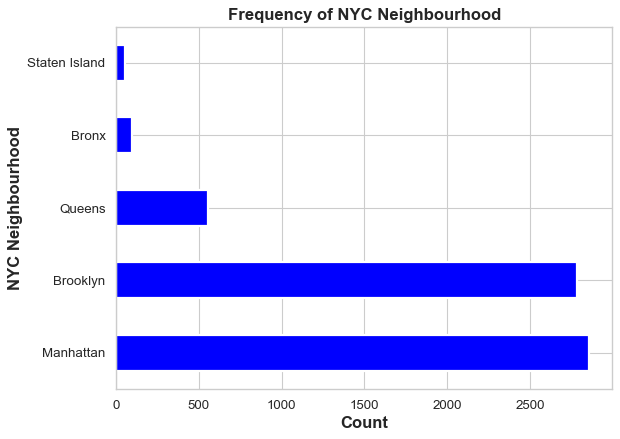

In [32]:
#Exploring the frequency of NYC neighbourhoods in airbnb dataset after cleaning.
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
figure= airbnb_data['neighbourhood'].value_counts().plot(kind='barh', 
                                               color="Blue",
                                               linewidth=2,
                                                )
plt.xlabel('Count', fontsize=15, weight='bold')
plt.ylabel('NYC Neighbourhood', fontsize=15, weight='bold')
figure.xaxis.set_tick_params(labelsize=12)
figure.yaxis.set_tick_params(labelsize=12)
plt.title('Frequency of NYC Neighbourhood', fontsize=15, weight='bold');

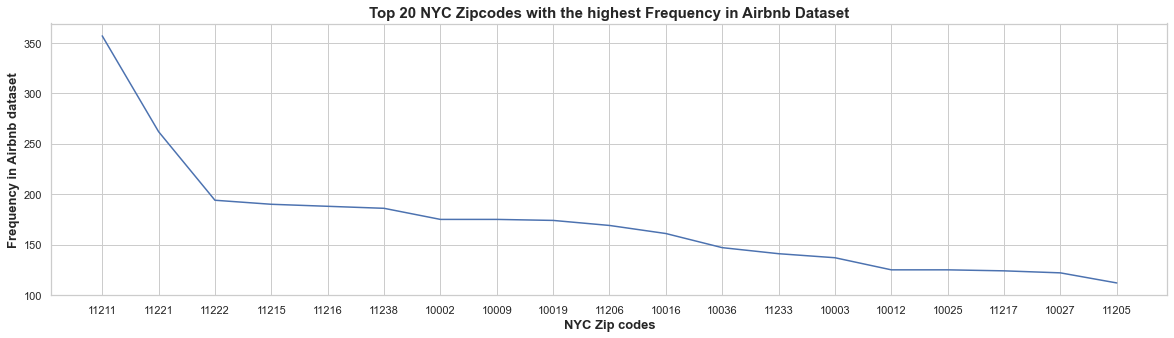

In [33]:
#Wondering how many records the airbnb data set has for each NYC zip code. 
#Looking at the trend through top 20s zip code with the highest count.
from matplotlib.pyplot import figure
figure(figsize=(20,5))
plt.plot(airbnb_data['zipcode'].apply(str).value_counts()[:19])
plt.xlabel('NYC Zip codes',fontsize=13, weight='bold')
plt.ylabel('Frequency in Airbnb dataset',fontsize=13, weight='bold')
plt.title("Top 20 NYC Zipcodes with the highest Frequency in Airbnb Dataset",fontsize=15, weight='bold');

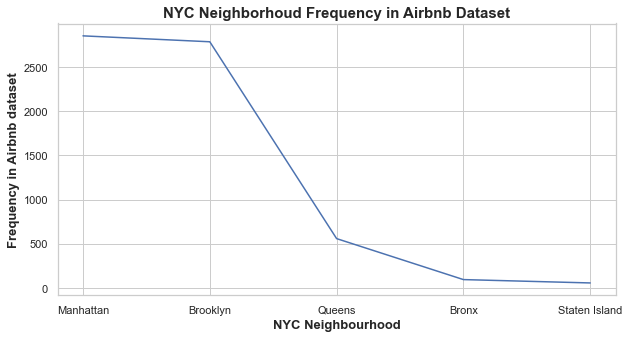

In [34]:
#Looking at the frequency of each NYC Neighbourhood through the clean airbnb dataset.
figure(figsize=(10,5))
plt.plot(airbnb_data['neighbourhood'].apply(str).value_counts())
plt.xlabel('NYC Neighbourhood',fontsize=13, weight='bold')
plt.ylabel('Frequency in Airbnb dataset',fontsize=13, weight='bold')
plt.title("NYC Neighborhoud Frequency in Airbnb Dataset",fontsize=15, weight='bold');

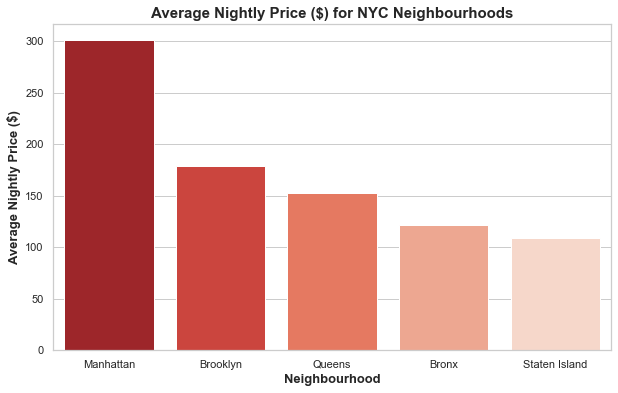

In [35]:
expensive_neighborhouds=airbnb_data.groupby('neighbourhood', 
                                            as_index=False)['price'].mean().sort_values(
                                            by='price', ascending=False)
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x=expensive_neighborhouds['neighbourhood'].iloc[:5], 
            y='price', 
            data=expensive_neighborhouds,
            palette="Reds_r");
plt.xlabel('Neighbourhood', fontsize=13, weight='bold')
plt.ylabel('Average Nightly Price ($)', fontsize=13, weight='bold')
plt.title('Average Nightly Price ($) for NYC Neighbourhoods', fontsize=15, weight='bold');

**Trend of property sales price between 2014 and 2017 for the top 7th zipcodes with the highest % appreciation in NYC.**

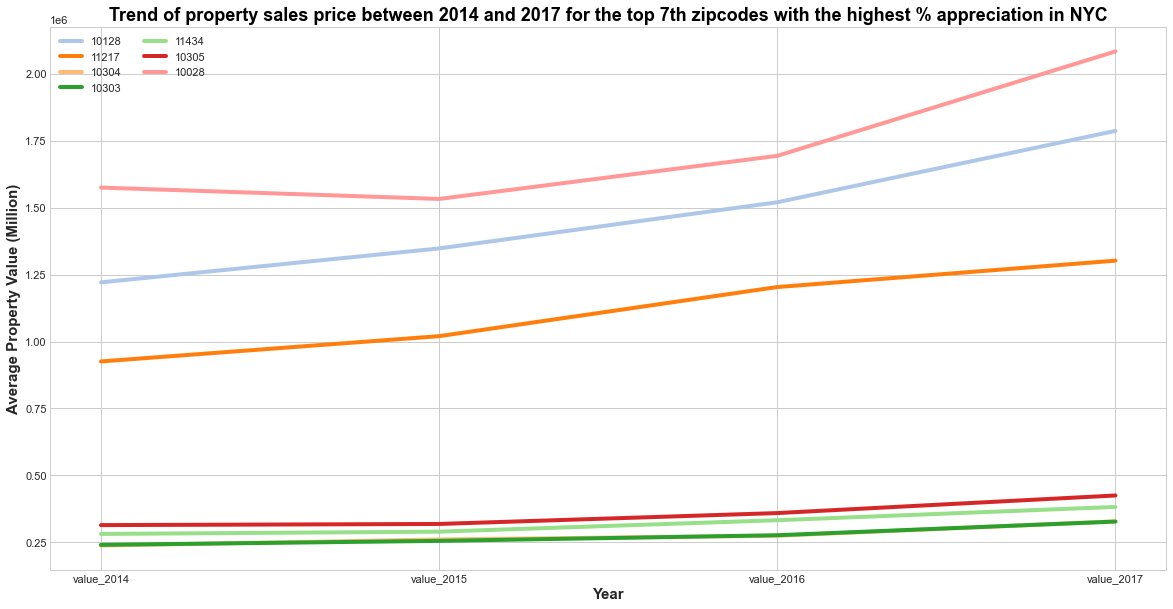

In [36]:
df_trend=zillow_nyc_df[['zipcode','value_2014','value_2015','value_2016','value_2017']].set_index('zipcode',drop=True)
df_trend['%appreciation']=100*(df_trend['value_2017']- df_trend['value_2014'])/df_trend['value_2014']
df_trend=df_trend.sort_values(by='%appreciation', ascending=False)[:7].T
df_trend=df_trend.drop('%appreciation', axis=0)

# style
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,10)

# create a color palette
palette = plt.get_cmap('tab20')
 
# multiple line plot
num=0
for column in df_trend:
    num+=1
    plt.plot(df_trend.index, df_trend[column], marker='', color=palette(num), 
             linewidth=4, label=column)
#add legend 
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Trend of property sales price between 2014 and 2017 for the top 7th zipcodes with the highest % appreciation in NYC", 
          loc='center', fontsize=18,
          weight='bold', color='Black')
plt.xlabel("Year", fontsize=15, weight='bold')
plt.ylabel("Average Property Value (Million)", fontsize=15, weight='bold');

***
<a id = FeatureEngineering> </a>
# Feature Engineering #

**Calculate Average Annual Occupancy**

**Make a data frame from airbnb df which has one row for each zipcode in NYC.**

**Make a column for average annual occupancy from occupancy rate of 75% in 365 days of year.**

**Make a column for annual rental income from average annual occupancy and nightly rental price for each properties.**

In [37]:
#Averaging airbnb data within each zip code
airbnb_df=airbnb_data.groupby(['zipcode'], as_index=False).mean()

#Making Average Annual Occupancy column
airbnb_df['avgerage_annual_occupancy']=365*0.75

#Calculating Annual Rental Income column
airbnb_df['annual_rental_income']=airbnb_df['price']*airbnb_df['avgerage_annual_occupancy']

**Property value appreciation between 2014-2017 (years with completed dataset and no nulls)**

**Calculate Home Price Appreciation Rate by:**
 $$FV = PV * [1+ {i}] ^{(n)} $$

In [38]:
#Calculating Value Return in 3 years between 2014-2017
zillow_nyc_df['value_return_3yrs']=zillow_nyc_df['value_2017']-zillow_nyc_df['value_2014']

#Calculating Property Value Appreciation Rate
zillow_nyc_df['property_value_appreciation_rate']=(((zillow_nyc_df['value_2017']/zillow_nyc_df['value_2014'])**(1/3) )-1)*100

***
<a id = Merging> </a>
# Merging airbnb and zillow dataset #

In [39]:
#After making sure Airbnb and Zillow datasets are unique and out of any duplicates data, it is time to :
#Merge Airbnb and Zillow dataset after averaging each tables within NYC Zip code.
merged_df=pd.merge(airbnb_df, zillow_nyc_df, on='zipcode')

## Developed Metrics ##
It should be noted that since data such as rental property fees and maintenance costs, actual occupancy rates, and proximity and access to public transportation, attractions and so forth are not available, it is assumed that:

• All rental properties have a similar occupancy rate.

• The rental income is directly proportional to the net rental income. That is, the ownership fees and costs are proportional to the rental income. 

• Rental Two-bedroom properties are consistent within each zip code in terms of return on investment. 

However, to provide better recommendations and make better decisions for rental property investments it would be vital to consider all the influential parameters and variables.

**Average Annual Occupancy**
The Average Annual Occupancy is calculated by assuming an Occupancy Rate of 75% for all rental properties. This assumption was made due to the lack of actual occupancy data in the Airbnb dataset and also lack of any other meaningful data in the dataset that would help to estimate the occupancies.

**Annual Rental Income**
The Annual Rental Income is calculated by multiplying the number of annual occupancy nights by the average nightly rental Price of properties within each zip code ("price" column in Airbnb dataset).

**Property Value Appreciation Rate**
Property value appreciation rate for each zip code is calculated using the following formula:

 $$FV = PV * [1+ {i}] ^{(n)} $$

Where,
  
  FV: future value
  
  PV: past value
  
  i: annual appreciation rate
  
  n: number of years

**Payback Years:**
Payback years is simply the number of years it takes to cover the purchase value (2017 value in the Zillow dataset) using the rental income (assuming the rental income is the net income).

**ROI:**
Return on Investment (ROI) is the percentage of the investment that will return annually and is calculated by dividing the Annual Rental Income by initial property cost (value when purchased).

**Total Expected Return on Investment:**
This metric considers both rental income and property value appreciation/depreciation to provide a more comprehensive return on investment metric. Since the rental properties are assets of the real estate company, their value appreciation/depreciation could affect their favorableness and thus should be taken into account. This metric is calculated by adding the Return on Investment and Property Value 
Appreciation Rate together.

In [40]:
# Years for return on investment without considering the property value appreciation/deppreciation
merged_df['payback_yrs']=merged_df['value_2017']/merged_df['annual_rental_income']

# Annual return on investment percentage considering the annual rental income as the net income
merged_df['roi']=merged_df['annual_rental_income']/merged_df['value_2017']*100

# Total expected return on investment percentage
merged_df['total_expected_roi']= merged_df['roi']+ merged_df['property_value_appreciation_rate']

# Years for expected return on investment
merged_df['expected_payback_yrs']=100/(merged_df['total_expected_roi'])

**The following plot shows that the annual rental income correlates with the property value. Zip codes with a higher annual income to property value are more favorable (those placed higher relative to the diagnol line in the graph).**

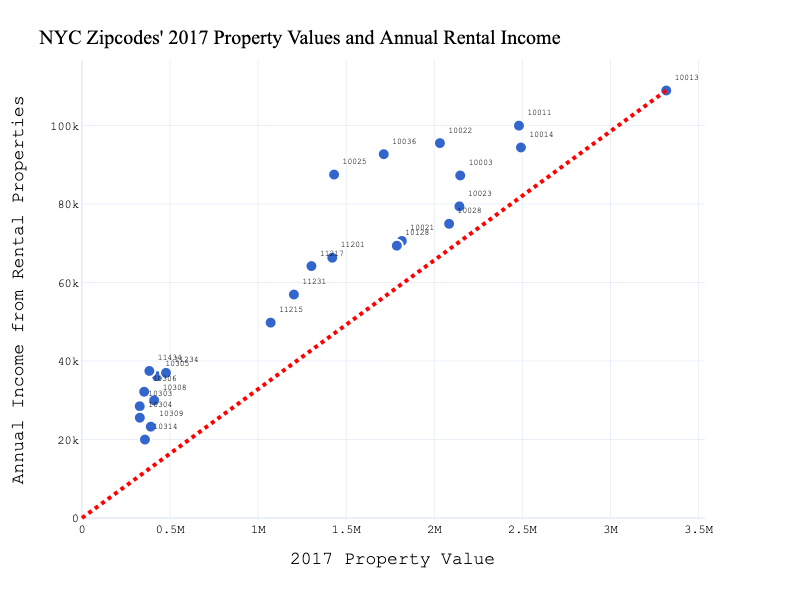

In [41]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig=px.scatter(data_frame= merged_df, 
               x=merged_df['value_2017'],
               y=merged_df['annual_rental_income'], 
               color_discrete_sequence=px.colors.qualitative.G10,
               text="zipcode",
               template='plotly_white')
#Add shape
fig.add_shape(type="line",
    x0=0, y0=0, x1=merged_df['value_2017'].max(),
    y1=merged_df['annual_rental_income'].max(),
    line=dict(color="Red",
        width=4,
        dash="dot",
    ))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='white')),
                  textposition='top right',
                  textfont_size=8)
fig.update_layout(height=600, width=1000,
                  font_family="Courier New",
                  font_color="black",
                  title_font_family="Times New Roman", titlefont=dict(size=20),
                  title_font_color="black",
                  legend_title_font_color="Blue",
                  title={'text':"NYC Zipcodes' 2017 Property Values and Annual Rental Income",
                      'yanchor': 'top',
                        'xanchor': 'left'},
                  yaxis=dict(title_text="Annual Income from Rental Properties", 
                             ticktext=["Very long label", "long label", "3", "label"],
                             titlefont=dict(size=18)),
                  xaxis=dict(title_text="2017 Property Value", 
                             ticktext=["Very long label", "long label", "3", "label"],
                             titlefont=dict(size=18))
                 )


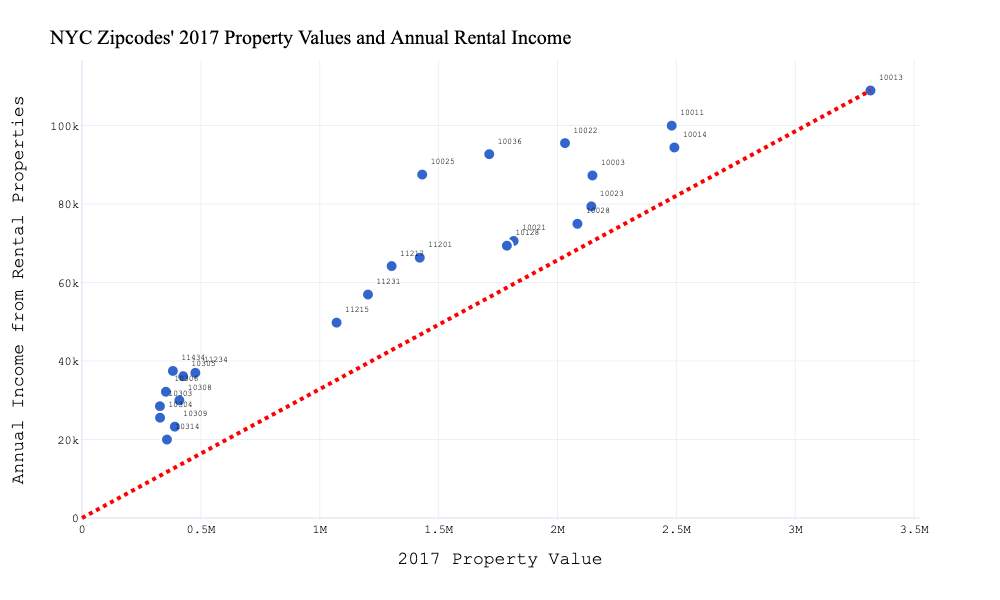

In [54]:
#I put the screenshot of the plot just in case. It is an interactive plotly plot.
from IPython.display import Image
Image("./value-income.png")

**Based on the plot below, zip codes 11434, 10303, 10305 and 10304 have the highest expected return on investment and the shortest payback period.**

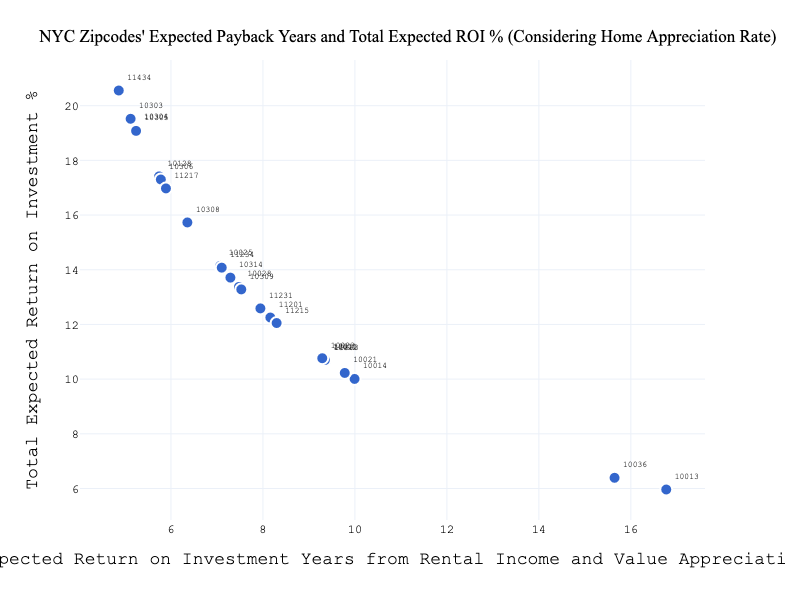

In [43]:
fig=px.scatter(data_frame= merged_df, 
               x=merged_df['expected_payback_yrs'],
               y=merged_df['total_expected_roi'], 
               color_discrete_sequence=px.colors.qualitative.G10,
               text="zipcode",
               template='plotly_white')

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='white')),
                  textposition='top right',
                  textfont_size=8)
fig.update_layout(height=600, width=1000,
                  font_family="Courier New",
                  font_color="black",
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  legend_title_font_color="gray",
                  title={'text':"NYC Zipcodes' Expected Payback Years and Total Expected ROI % (Considering Home Appreciation Rate)",
                      'yanchor': 'top',
                        'xanchor': 'left'},
                  yaxis=dict(title_text="Total Expected Return on Investment %", 
                             ticktext=["Very long label", "long label", "3", "label"],
                             titlefont=dict(size=18)),
                  xaxis=dict(title_text="Expected Return on Investment Years from Rental Income and Value Appreciation", 
                             ticktext=["Very long label", "long label", "3", "label"],
                             titlefont=dict(size=18))
                 )

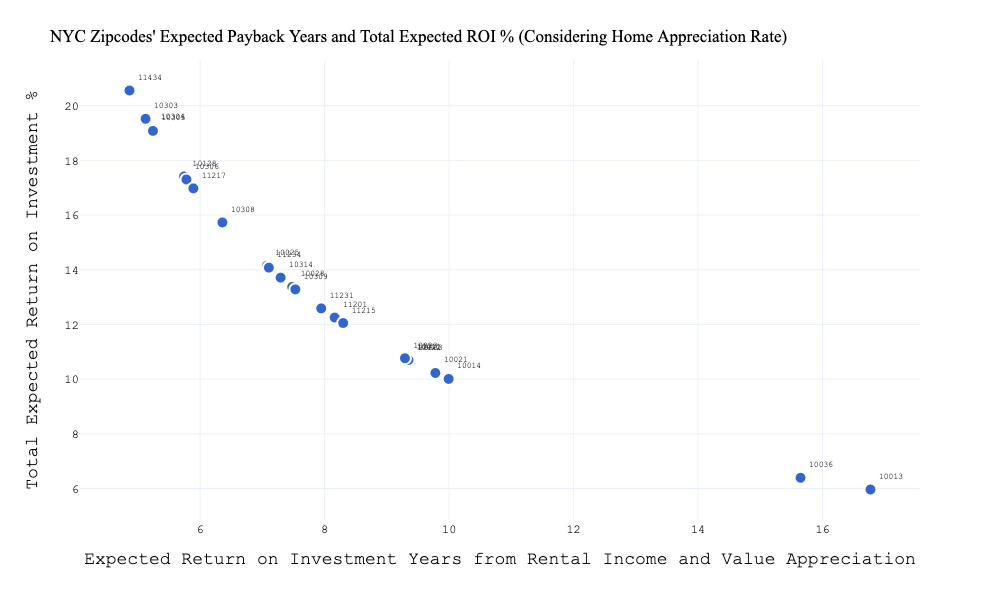

In [55]:
#I put the screenshot of the plot just in case. It is an interactive plotly plot.
from IPython.display import Image
Image("./Years-ROI.png")

**Based on the plot below, zip codes with a relatively lower average property price tend to have better return on investment rates. The data suggests that the average nightly rental income does not grow proportional to the property value when comparing different zip codes. However, it is worth noting that the rental income values used for this projects are all calculated based on a 75% nightly occupancy, and also rental property expenses such as maintenance costs are not taken into account due to the lack of data. The use of actual occupancy data nad rental property expenses wil result in a more accurate analysis.**

**This gragh suggests zip codes 11434, 10303, 10304 and 10305 have the highest expected return on investment and zip code 10013 that is the most expensive zip code has the lowest return on investment.**

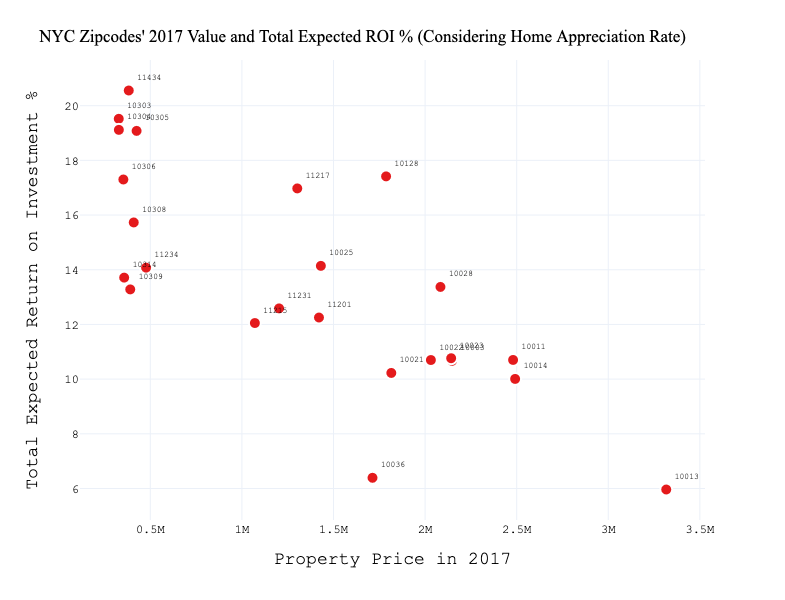

In [45]:
fig=px.scatter(data_frame= merged_df, 
               x=merged_df['value_2017'],
               y=merged_df['total_expected_roi'], 
               color_discrete_sequence=px.colors.qualitative.Set1,
               text="zipcode",
               template='plotly_white')

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='white')),
                  textposition='top right',
                  textfont_size=8)
fig.update_layout(height=600, width=1000,
                  font_family="Courier New",
                  font_color="black",
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  legend_title_font_color="gray",
                  title={'text':"NYC Zipcodes' 2017 Value and Total Expected ROI % (Considering Home Appreciation Rate)",
                      'yanchor': 'top',
                        'xanchor': 'left'},      
                  yaxis=dict(title_text="Total Expected Return on Investment %", 
                             ticktext=["Very long label", "long label", "3", "label"],
                             titlefont=dict(size=18)),
                  xaxis=dict(title_text="Property Price in 2017", 
                             ticktext=["Very long label", "long label", "3", "label"],
                             titlefont=dict(size=18)))

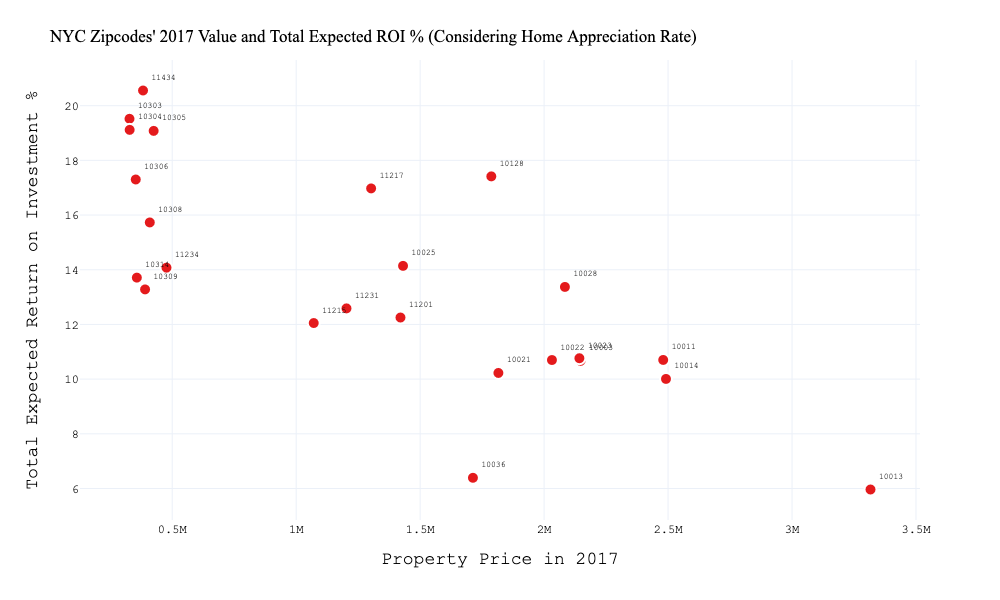

In [56]:
#I put the screenshot of the plot just in case. It is an interactive plotly plot.
from IPython.display import Image
Image("./Pice-ROI.png")

**The graph below represents the zip codes 11434 and 10303 have the highest expected return on investment percentage through all the NYC zip codes**

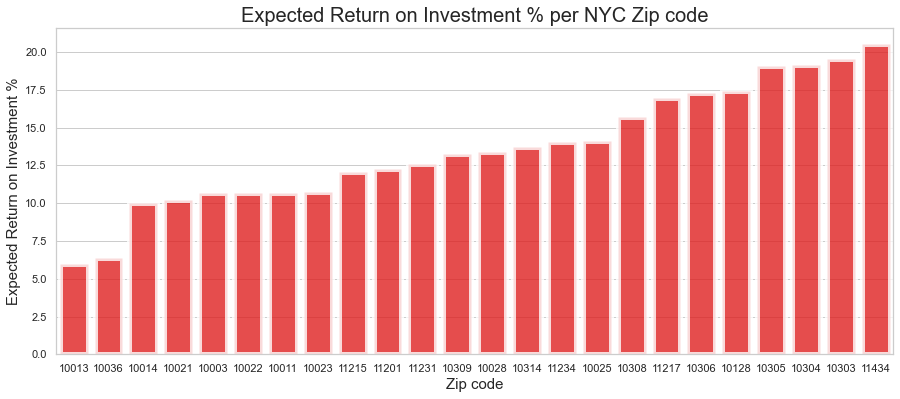

In [47]:
sort_by_metric= merged_df.sort_values(by='total_expected_roi', ascending=True)
sort_by_metric['zipcode']=sort_by_metric['zipcode'].apply(str)

plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid", font_scale=1)
ax= sns.barplot(x=sort_by_metric['zipcode'], 
            y=sort_by_metric['total_expected_roi'], 
            data=sort_by_metric.sort_values(by='total_expected_roi', 
                                            ascending=False), 
            color="red",
            alpha=0.8, 
            linewidth=5)
ax.axes.set_title('Expected Return on Investment % per NYC Zip code', fontsize=20)
ax.set_xlabel("Zip code",fontsize=15)
ax.set_ylabel("Expected Return on Investment %",fontsize=15);

**Based on the graph below, the zip codes 11434 and 10306 have the highest return on investment %.**

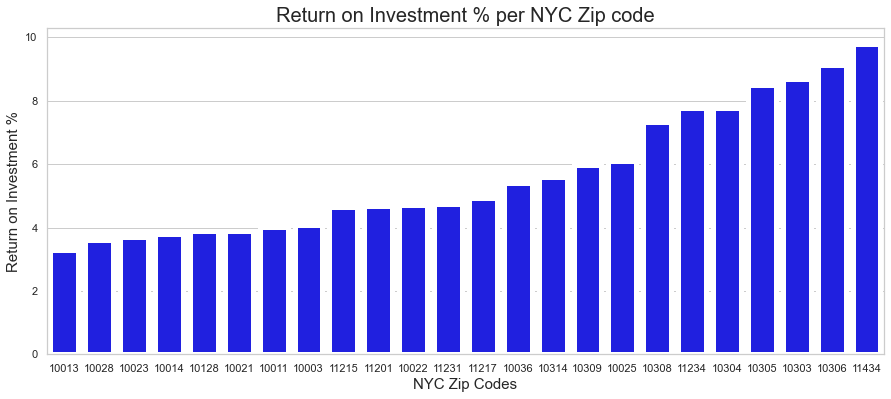

In [48]:
sort_by_metric= sort_by_metric.sort_values(by='roi', ascending=True)
plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")
ax= sns.barplot(x=sort_by_metric['zipcode'], 
            y=sort_by_metric['roi'], 
            data=sort_by_metric.sort_values(by='total_expected_roi', 
                                            ascending=False), 
            color='blue', linewidth=5);
ax.axes.set_title('Return on Investment % per NYC Zip code', fontsize=20)
ax.set_xlabel("NYC Zip Codes",fontsize=15)
ax.set_ylabel("Return on Investment %",fontsize=15);

**The plot below shows the NYC zip codes and the median properties' values in 2017.**

**The zip codes 10303, 10304 and 10314 in Staten Island neighbourhood have the lowest median property values.**

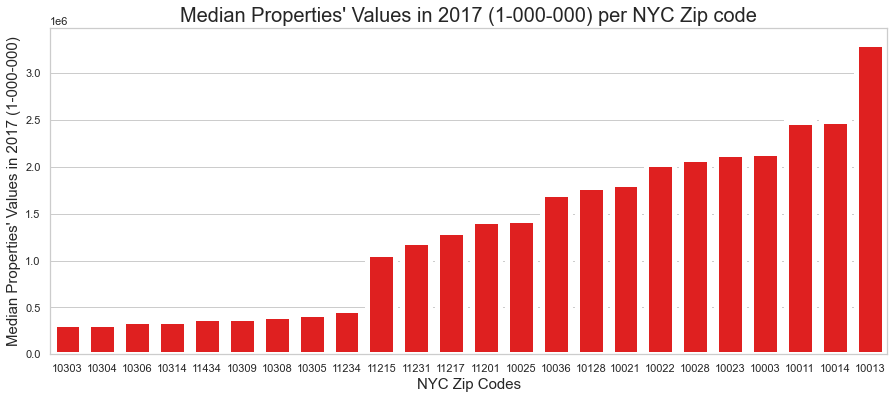

In [49]:
sort_by_metric= sort_by_metric.sort_values(by='value_2017', ascending=True)
plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")
ax= sns.barplot(x=sort_by_metric['zipcode'], 
            y=sort_by_metric['value_2017'], 
            data=sort_by_metric.sort_values(by='value_2017', 
                                            ascending=False),
            color='red', linewidth=5)
ax.axes.set_title("Median Properties' Values in 2017 (1-000-000) per NYC Zip code", fontsize=20)
ax.set_xlabel("NYC Zip Codes",fontsize=15)
ax.set_ylabel("Median Properties' Values in 2017 (1-000-000)",fontsize=15);

**The plot below represents the NYC Zip codes and their Return on Investment Years which the lowest the years, the better the ROI.**

**Zip codes 11434 and 10306 would have the shortest payback duration for the investment.**

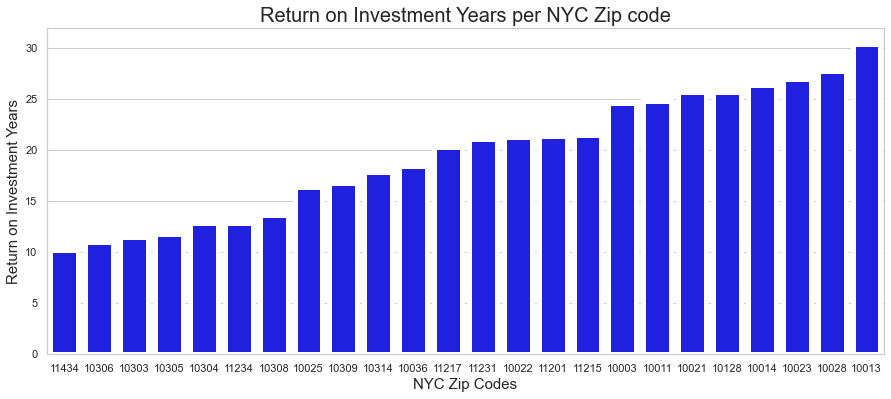

In [50]:
sort_by_metric= sort_by_metric.sort_values(by='payback_yrs', ascending=True)
plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")
ax= sns.barplot(x=sort_by_metric['zipcode'], 
            y=sort_by_metric['payback_yrs'], 
            data=sort_by_metric.sort_values(by='payback_yrs', 
                                            ascending=False),
            color='blue', linewidth=5)
ax.axes.set_title("Return on Investment Years per NYC Zip code", fontsize=20)
ax.set_xlabel("NYC Zip Codes",fontsize=15)
ax.set_ylabel("Return on Investment Years",fontsize=15);

**Below, it can be seen that the zip codes 11434 and 10303 have the lowest payback years for the expected return on investment considering the appreciation rate.**

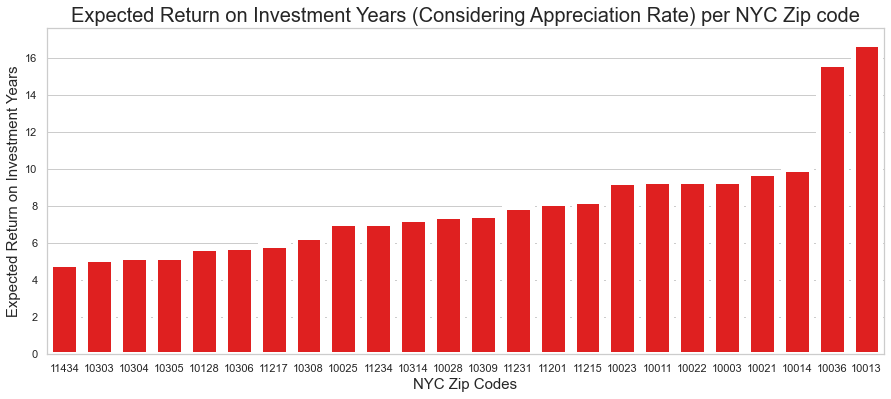

In [51]:
sort_by_metric= sort_by_metric.sort_values(by='expected_payback_yrs', ascending=True)
plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")
ax= sns.barplot(x=sort_by_metric['zipcode'], 
            y=sort_by_metric['expected_payback_yrs'], 
            data=sort_by_metric.sort_values(by='payback_yrs', 
                                            ascending=False),
            color='Red', linewidth=5)
ax.axes.set_title("Expected Return on Investment Years (Considering Appreciation Rate) per NYC Zip code", fontsize=20)
ax.set_xlabel("NYC Zip Codes",fontsize=15)
ax.set_ylabel("Expected Return on Investment Years",fontsize=15);

***
<a id = Folium> </a>
## Folium Map ##
**I used json file from NYC zip codes to create NYC map and show final results on it.**

In [52]:
# Read JSON file for NYC zipcode
import json
merged_df['zipcode']=merged_df['zipcode'].apply(str)
ny=merged_df
ny.sort_values(by=['zipcode'], inplace=True)

with open('nyc_zip_code_tabulation_areas_polygons.geojson') as f:
    json_zipcode= json.load(f)
#json_zipcode= sorted(json_zipcode["features"],
                    #key=lambda x:x["properties"]["postalcode"])

In [53]:
import folium
m_ny = folium.Map(location = [40.730610, -73.935242], zoom_start = 11)

choropleth = folium.Choropleth(
              geo_data = json_zipcode,
              name = 'choropleth',
              data = ny,
              columns = ['zipcode', 'total_expected_roi'],
              key_on = 'properties.postalcode',
              fill_color = "Reds",
              nan_fill_color='Gray',
              fill_opacity = .6,
              line_opacity = .5,
              legend_name = 'Total Expected ROI %',
              highlight = True).add_to(m_ny)

choropleth.geojson.add_child(folium.features.GeoJsonTooltip(
    ['postalcode', 'borough'],
    aliases = ['zipcode', 'borough'],
    style=('background-color: gray; color: white;'),
    localize=True).add_to(m_ny))
m_ny

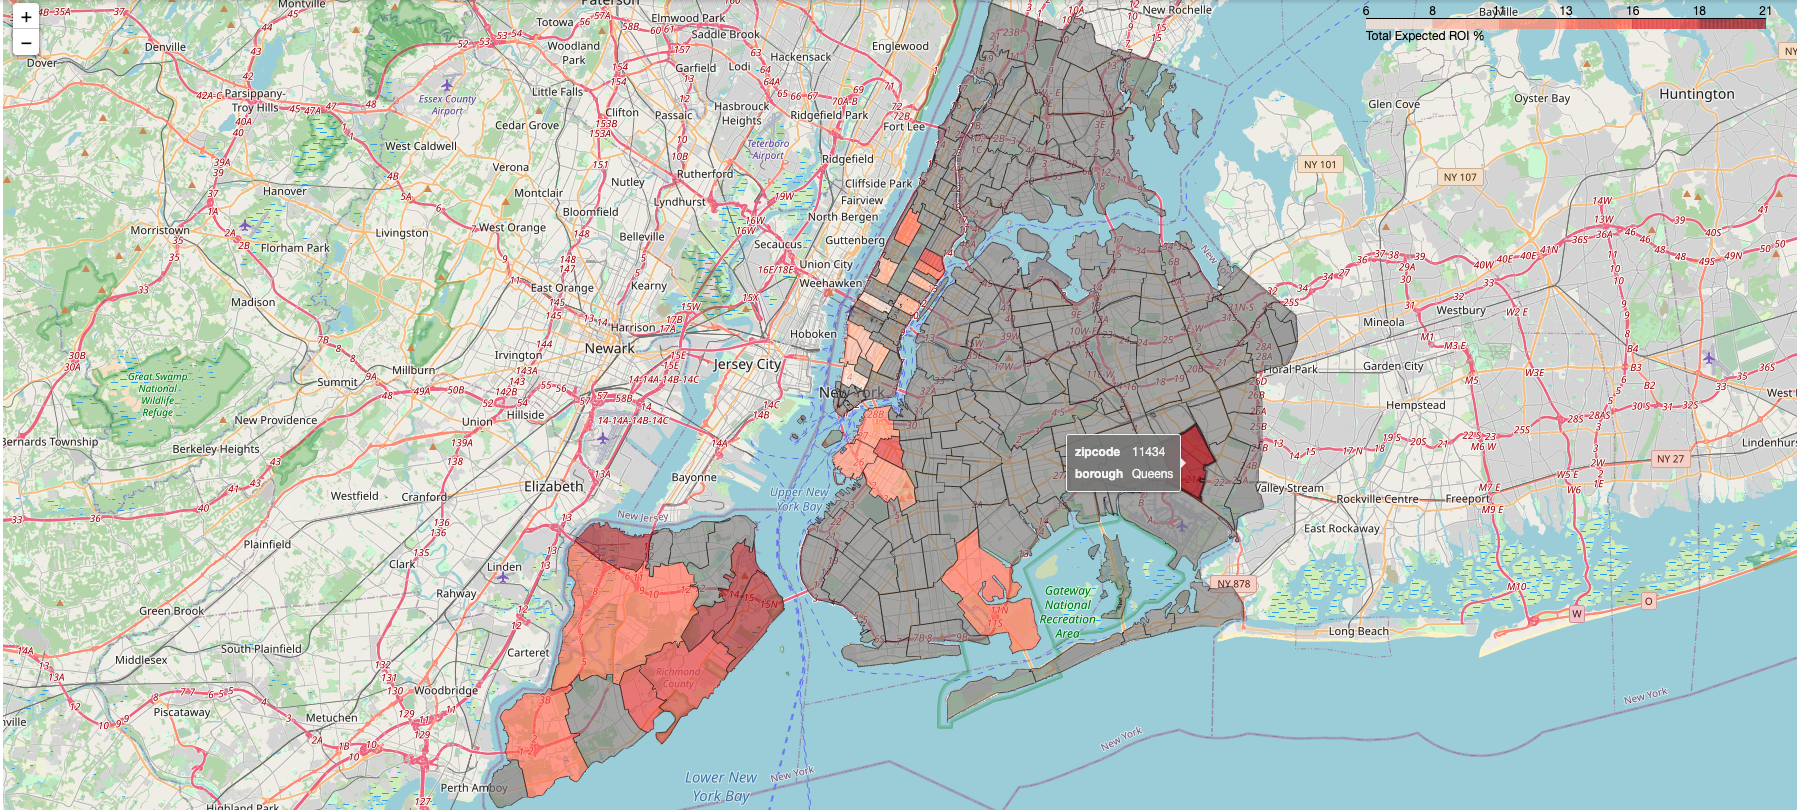

In [57]:
#I put the screenshot of the folium map just in case. It is an interactive map from NYC, 
#you can click on any zipcode and find the neighbourhood.
from IPython.display import Image
Image("./screenshot- interactive map.png")

In [102]:
import folium
m_ny = folium.Map(location = [40.730610, -73.935242], zoom_start = 11)

choropleth = folium.Choropleth(
              geo_data = json_zipcode,
              name = 'choropleth',
              data = ny,
              columns = ['zipcode', 'roi'],
              key_on = 'properties.postalcode',
              fill_color = "YlGnBu",
              nan_fill_color='Gray',
              fill_opacity = .6,
              line_opacity = .5,
              legend_name = 'ROI %',
              overlay=True,
              highlight = True).add_to(m_ny)

choropleth.geojson.add_child(folium.features.GeoJsonTooltip(
    ['postalcode', 'borough'],
    aliases = ['zipcode', 'borough'],
    style=('background-color: gray; color: white;'),
    localize=True).add_to(m_ny))
m_ny

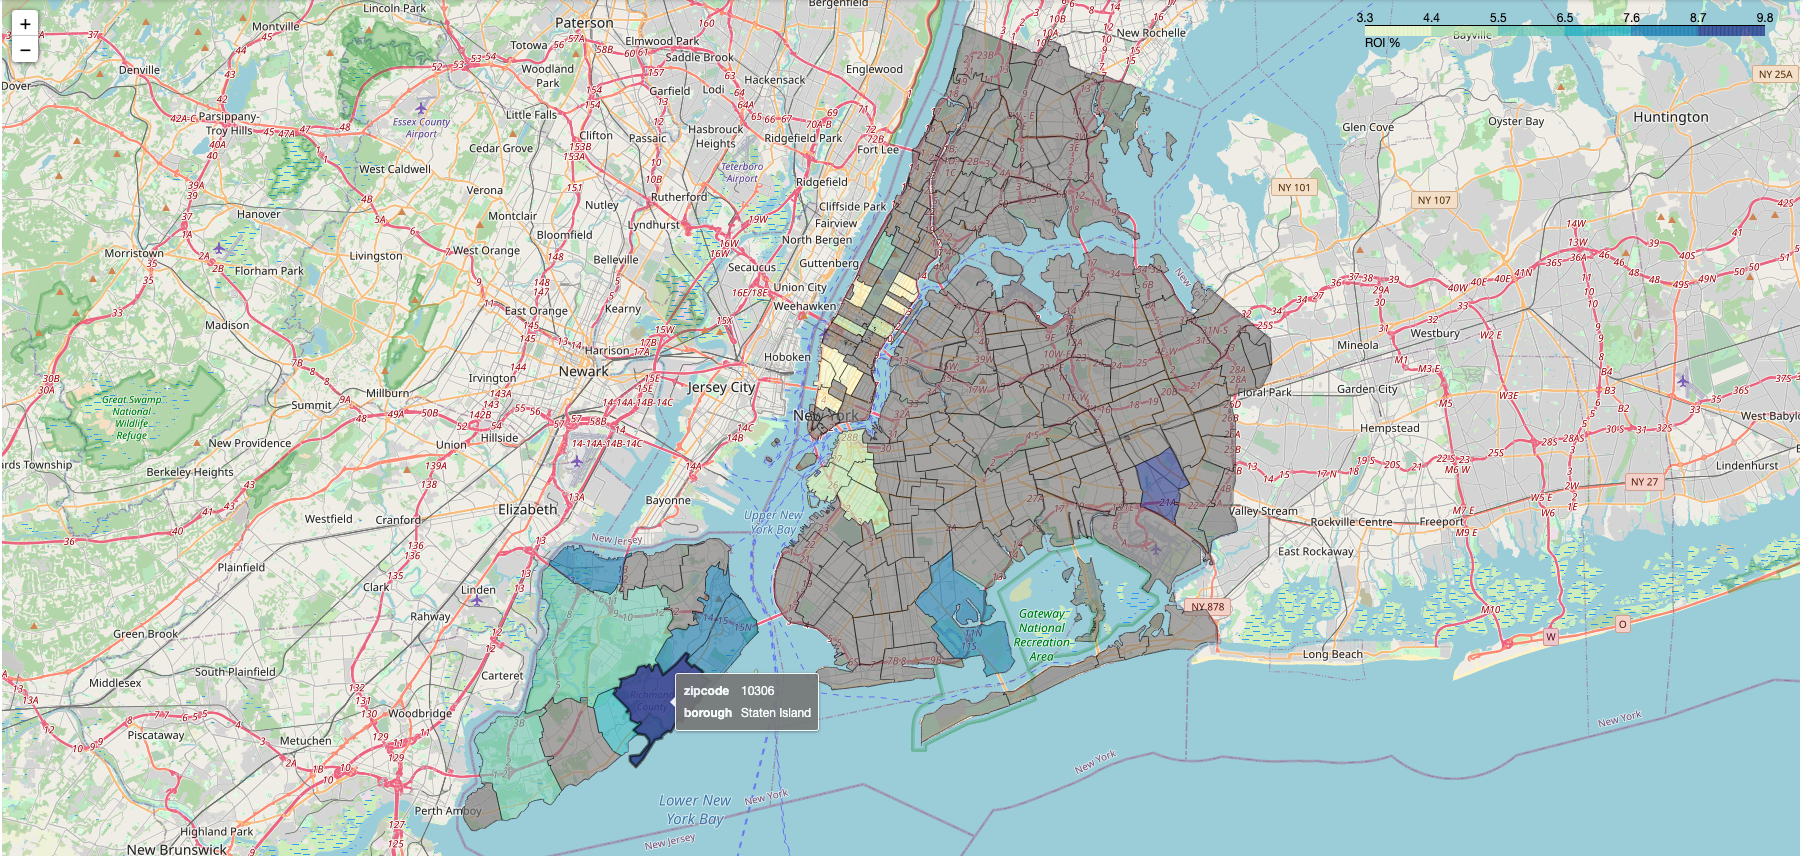

In [58]:
#I put the screenshot of the folium map just in case. It is an interactive map from NYC, 
#you can click on any zipcode and find the neighbourhood.
from IPython.display import Image
Image("./screenshot 2- interactive map.png")

***
<a id = Insight> </a>
## Hypothesis Insight ##

**The t test statistic is 0.689 and the corresponding two-sided p-value is 0.506.**

**The two hypotheses for this particular two sample t-test are as follows:**

**H0: µ1 = µ2 (the two population means are equal)**

**HA: µ1 ≠µ2 (the two population means are not equal)**

**Because the p-value of our test (0.506) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.**

**We do not have sufficient evidence to say that the mean expected of Return on Investment for rental properties between the two zip code (11434 and 10303) populations is different.**

In [59]:
airbnb_11434= airbnb_data[airbnb_data['zipcode']==11434]
value_11434=zillow_nyc_df[zillow_nyc_df['zipcode']==11434]
zipcode_11434=pd.merge(airbnb_11434, value_11434, on='zipcode')
zipcode_11434['home_appreciation']= (((zipcode_11434['value_2017']/zipcode_11434['value_2014'])**(1/3) )-1)*100
zipcode_11434['roi']= (zipcode_11434['price']*0.75*365)/ zipcode_11434['value_2017']*100
zipcode_11434['expected_roi']= zipcode_11434['roi']+ zipcode_11434['home_appreciation']
group1=zipcode_11434['expected_roi']

airbnb_10303= airbnb_data[airbnb_data['zipcode']==10303]
value_10303=zillow_nyc_df[zillow_nyc_df['zipcode']==10303]
zipcode_10303=pd.merge(airbnb_10303, value_10303, on='zipcode')
zipcode_10303['home_appreciation']= (((zipcode_10303['value_2017']/zipcode_10303['value_2014'])**(1/3) )-1)*100
zipcode_10303['roi']= (zipcode_10303['price']*0.75*365)/ zipcode_10303['value_2017']*100
zipcode_10303['expected_roi']= zipcode_10303['roi']+ zipcode_10303['home_appreciation']
group2=zipcode_10303['expected_roi']

In [60]:
#find variance for each group
print(np.var(group1), np.var(group2))

17.255641425388777 3.3182254826199657


In [61]:
import scipy.stats as stats

#perform two sample t-test with unequal variances
stats.ttest_ind(a=group1, b=group2, equal_var=False)

Ttest_indResult(statistic=0.6890195471715412, pvalue=0.5060863844850018)

***
<a id = Conclusion> </a>
## Conclusion and Final Insights ##

This analysis used a Zillow dataset including historic average two-bedroom property prices and an Airbnb dataset containing short term rental property information such as type, location, and rental prices to develop several metrics for ranking the zip codes based on their expected return on investment. The following **assumption** were made to perform the analysis:

1. **No mortgage:** Properties are fully paid by cash without mortgage.

2. **75% occupancy:** Since occupancy data was not available it was assumed that all rental properties in NYC have a 75% occupancy rate. *However, the occupancy is affected by many factors such as proximity and access to public transportation, attractions, shops and restaurants and so on.*

3. **Nightly prices proportional to net rental income:** Since the rental property expenses such as tax, fees, and maintenance costs were not available it was assumed that the nightly rental income and the net rental income are proportional with a linear relationship. That is, it was assumed that using the nightly rental income instead of net rental income would not change the relative rankings when comparing return on investments.

4. **Property prices and nightly rentals are consistent within each zip code:** It was assumed that the average two-bedroom property prices and nightly rental prices are consistent within each zip code and the average value can fairly represent the rental properties located within the zip code. *However, even within one zip code, factors such as the area covered by the zip code, change of population density, location of attractions, and ease of access to public transportation can considerably affect property values and nightly rental prices.*

5. **Property price in each zip code is proportional to square footage and the effect of number of bathrooms is proportionally reflected in property value and nightly rental price.**
 
Based on the analysis presented and the assumptions made, the **conclusion** is:
1.	Zip codes **11434, 10303,** and **10304** are respectively expected to have **the highest rate of return on investment.**

2.	Zip codes with the highest expected ROI are located in **Queens** and **Staten Island** neighborhoods.

3.	The results suggest that rental properties located in zip codes with lower prices outside of the densely populated neighborhoods have the highest potential Return on Investment. 

However, this analysis was performed using *limited data* and in a *shorter than ideal timeframe.* In order to better analyze the NYC zip codes favorableness in terms of real estate investment on short term rental properties more *insights* and a deeper analysis is needed. More data can be collected and used to address some of the *uncertainties* and *questions* such as:
1.	What are the actual occupancy rates for different zip codes?

2.	Which zip codes tend to favor shorter or longer (nightly, weekly and monthly) rental periods and how that would affect the rental income?

3.	How does population density of the area affect property prices, rental prices, and occupancy rates?

4.	How does proximity to the attractions or ease of access to public transportation affect property prices, rental prices, rental periods, and occupancy rates?

5.	What is the effect of taxes, fees, and maintenance costs on the net rental income (net ROI) and how do these expenditures change with the change of property value and location? 

6.	The annual rate of property value appreciation was considered in this analysis. Additional data on average percent increase in rental prices for each zip code can provide more insights on short term rental real estate market trends and help to provide better predictions.

7.	Rental properties closer to the attractions and located in densely populated areas are expected to have higher values and higher rental prices. Properties located outside the densely populated areas in the proximity of public transportation stations can have much lower property values but be favorable for renters since they can offer lower rental prices. A deeper analysis is needed to investigate the effect of all these parameters on rental periods, occupancy rates, net rental income, and the ROI.
 